# Context

Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!

# Content
Attribute Information:

invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

gender: String variable of the customer's gender.

age: Positive Integer variable of the customers age.

category: String variable of the category of the purchased product.

quantity: The quantities of each product (item) per transaction. Numeric.

price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).

payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.

invoice_date: Invoice date. The day when a transaction was generated.

shopping_mall: String variable of the name of the shopping mall where the transaction was made.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Data input

In [3]:
df = pd.read_csv("customer_shopping_data.csv")
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.tail(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [6]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
df.shape

(99457, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
# Check for missing values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [13]:
# Drop rows with missing values
df =df.dropna()

In [14]:
# Confirm that there are no more missing values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [18]:
# Get a unique list of shopping malls
shopping_malls = df['shopping_mall'].unique()

# Get the number of shopping malls in the dataset
num_shopping_malls = len(shopping_malls)

# Print the number of shopping malls in the dataset
print('Number of shopping malls in the dataset:', num_shopping_malls)


Number of shopping malls in the dataset: 10


In [20]:
# Get the count of each payment method
payment_counts = df['payment_method'].value_counts()

# Print the count of each payment method
print('Payment Method Counts:')
print(payment_counts)

Payment Method Counts:
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


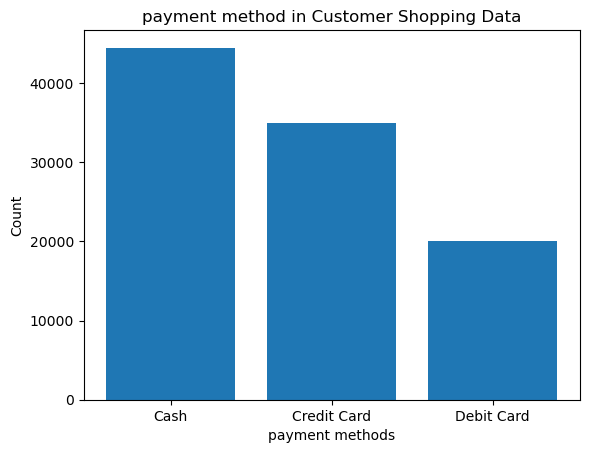

In [32]:
# Create a bar plot of the gender counts
plt.bar(payment_counts.index, payment_counts.values)

# Add labels and title to the plot
plt.xlabel('payment methods')
plt.ylabel('Count')
plt.title('payment method in Customer Shopping Data')

# Show the plot
plt.show()

In [21]:
# Get the count of each category
category_counts = df['category'].value_counts()

# Print the count of each category
print('Category Counts:')
print(category_counts)

Category Counts:
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64


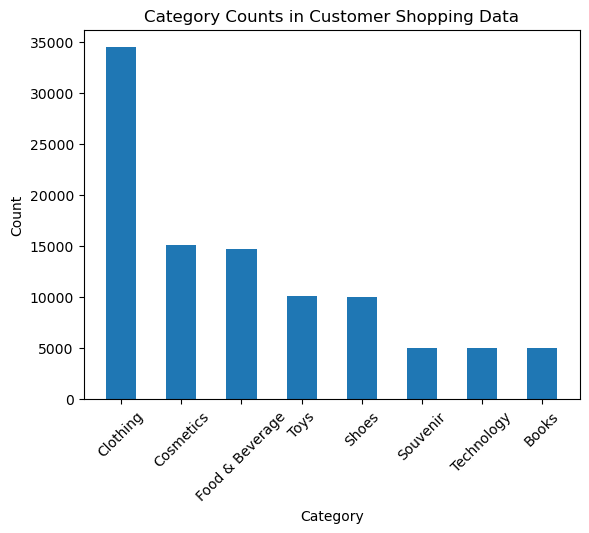

In [31]:
# Create a bar plot of the category counts
plt.bar(category_counts.index, category_counts.values, width=0.5)

# Add labels and title to the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts in Customer Shopping Data')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
# Get the count of each category
age_counts = df['age'].value_counts()

# Print the count of each category
print('Age Counts:')
print(age_counts)

Age Counts:
37    2057
22    2051
64    2002
43    2000
51    1993
30    1981
24    1977
40    1960
48    1955
36    1954
38    1954
28    1953
27    1950
39    1947
21    1947
61    1945
52    1945
19    1936
56    1916
33    1913
46    1911
62    1909
44    1904
53    1903
67    1901
69    1901
23    1897
26    1896
68    1893
42    1892
41    1892
32    1891
63    1886
29    1885
49    1883
34    1883
47    1880
57    1879
66    1876
45    1876
58    1875
59    1874
60    1874
50    1873
31    1866
25    1863
65    1856
18    1844
20    1844
55    1843
35    1841
54    1830
Name: age, dtype: int64


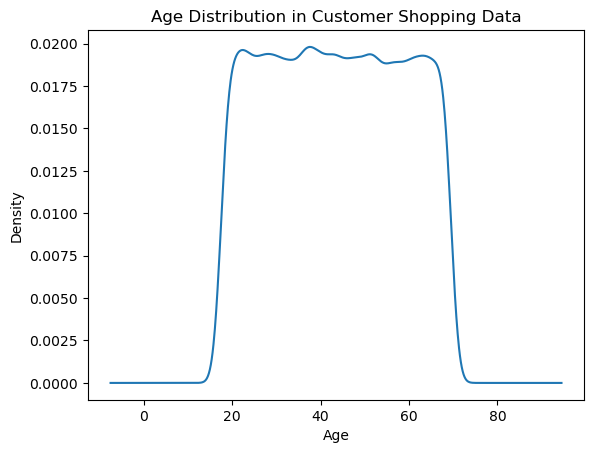

In [28]:
# Create a density plot of the age distribution
df['age'].plot(kind='density')

# label and plot title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution in Customer Shopping Data')

# Show the plot
plt.show()

In [23]:
# Get the count of each category
gender_counts = df['gender'].value_counts()

# Print the count of each category
print('Gender Counts:')
print(gender_counts)

Gender Counts:
Female    59482
Male      39975
Name: gender, dtype: int64


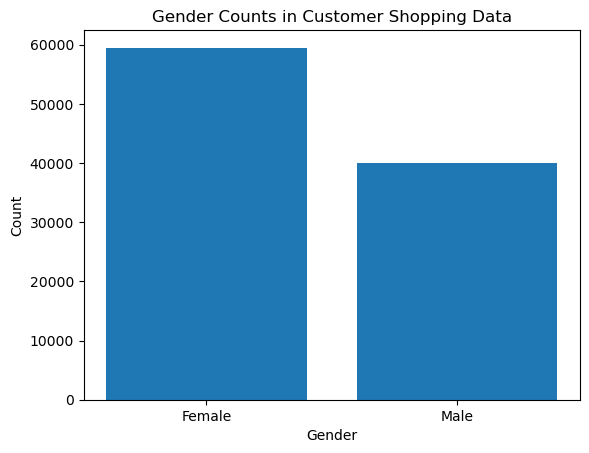

In [24]:
# Create a bar plot of the gender counts
plt.bar(gender_counts.index, gender_counts.values)

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts in Customer Shopping Data')

# Show the plot
plt.show()

In [33]:
# Group the data by category and sum the quantity and price for each category
category_sales = df.groupby('category').agg({'quantity': 'sum', 'price': 'sum'})

# Calculate the revenue for each category by multiplying quantity by price
category_sales['revenue'] = category_sales['quantity'] * category_sales['price']

# Sort the categories by revenue in descending order
category_sales = category_sales.sort_values(by='revenue', ascending=False)

# Print the category sales information
print('Category Sales:')
print(category_sales)

Category Sales:
                 quantity        price       revenue
category                                            
Clothing           103558  31075684.64  3.218136e+12
Shoes               30217  18135336.89  5.479955e+11
Technology          15021  15772050.00  2.369120e+11
Cosmetics           45465   1848606.90  8.404691e+10
Toys                30321   1086704.64  3.294997e+10
Food & Beverage     44277    231568.71  1.025317e+10
Books               14982    226977.30  3.400574e+09
Souvenir            14871    174436.83  2.594050e+09


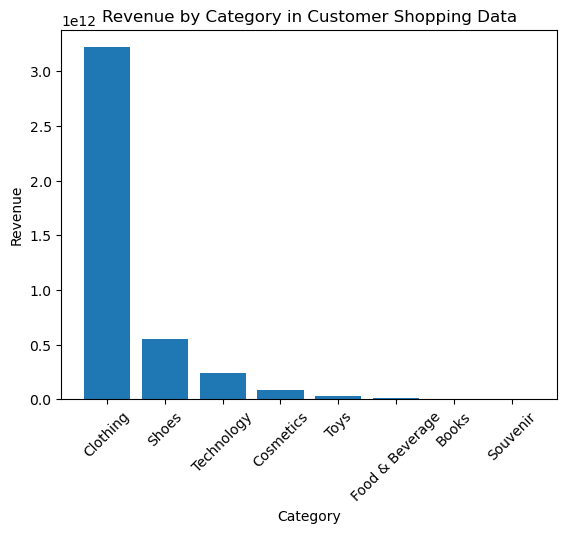

In [34]:
# Create a bar plot of the revenue for each category
plt.bar(category_sales.index, category_sales['revenue'])

# Add labels and title to the plot
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category in Customer Shopping Data')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Because there is no sales column in the dataset, I have to create sales data in order to know whichh category make more sales